In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C,D,K')
df.rename(columns={'location':'국가','date':'일자', 'total_cases_per_million':'발생률'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.03.30']
df

,국가,일자,발생률
765,Afghanistan,22.03.30,4461.255
1542,Africa,22.03.30,8413.728
2307,Albania,22.03.30,95236.438
3072,Algeria,22.03.30,5954.327
3831,Andorra,22.03.30,517413.450
...,...,...,...
170023,Wallis and Futuna,22.03.30,40923.021
170822,World,22.03.30,61824.499
171542,Yemen,22.03.30,387.168
172285,Zambia,22.03.30,16730.392


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents) 
df = df[~filt]
df

,국가,일자,발생률
765,Afghanistan,22.03.30,4461.255
2307,Albania,22.03.30,95236.438
3072,Algeria,22.03.30,5954.327
3831,Andorra,22.03.30,517413.450
4572,Angola,22.03.30,2921.528
...,...,...,...
169495,Vietnam,22.03.30,96489.426
170023,Wallis and Futuna,22.03.30,40923.021
171542,Yemen,22.03.30,387.168
172285,Zambia,22.03.30,16730.392


In [4]:
country_with_rank = df[['국가', '발생률']]
country_with_rank = country_with_rank.sort_values(by=['발생률'], ascending=0)
country_with_rank.head(3)

,국가,발생률
53374,Faeroe Islands,706541.904
42733,Denmark,525491.708
3831,Andorra,517413.450


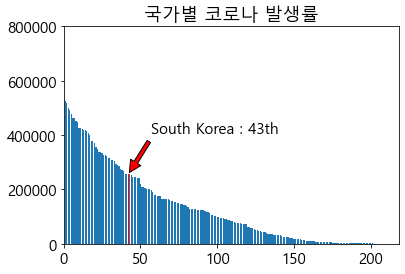

In [5]:
country_list = country_with_rank['국가'].tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank['발생률'].tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.title('국가별 코로나 발생률')
plt.axis([0, 218, 0, 800000])

korea_rank = country_list.index('South Korea')
korea_incidence_rate = country_with_rank[country_with_rank['국가'] == 'South Korea']['발생률'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1) + 'th',
            xy=(korea_rank, korea_incidence_rate),
            xytext=(korea_rank + 15, korea_incidence_rate + 150000),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()